# PATTERN RECOGNITION

In [19]:
NAME = "Evangelos Chatzianagnostis"
AEM = "2865"

In [20]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# to load mnist
import tensorflow as tf
from tensorflow import keras
from keras import datasets

# 1. Load Data

Import mnist from Keras

In [21]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#from 28*28 to 784
x_train = tf.reshape(x_train, [60000,-1])
x_test =  tf.reshape(x_test, [10000,-1])

Load only a subset of it, consisting of the classes (digits) i =
1, 3, 7, 9. Let Mi
, Ni be the number of training and test images for class i. M  containing
the training data, N  containing test data, as well as Ltr,Lte,  containing the corresponding class labels i

In [22]:
M_i = 0     #M and L_tr size
M = []      #x_train (classes 1, 3, 7, 9)
L_tr = []   #y_train

N_i = 0     #N and L_te size
N = []      #x_test(classes 1, 3, 7, 9)
L_te = []   #y_test()

for i in range(60000):
  if(y_train[i]%2 == 1 and not(y_train[i]==5)):
    M.append(x_train[i])
    L_tr.append(y_train[i])
    M_i = M_i + 1
    if(i<10000):
      N.append(x_train[i])
      L_te.append(y_train[i])
      N_i = N_i + 1

# 2. Normalize Data

Reshape M and N from 784 to 28*28

In [25]:
M = np.reshape(M, (M_i,28,28))
Nk = np.reshape(N, (N_i,28,28))

From each image matrix, extract a two-dimensional feature vector m using the
following process: the first feature component is the mean pixel value of all image matrix
rows with odd index, while the second feature component is calculated as the mean pixel
value of all image matrix columns whose index is an even number.

In [26]:
m = []

for i in range(M_i):
  odd_sum = 0
  even_sum = 0
  for j in range(28):   #rows
    for k in range(28): #columns
      if(j%2 == 1):
        odd_sum = odd_sum + M[i][j][k]
      if(k%2 == 0):
        even_sum = even_sum + M[i][j][k]
  odd_mean = odd_sum/(784/2)
  even_mean = even_sum/(784/2)
  m.insert(i,[odd_mean, even_mean])

Use a scatter plot to visualize all rows of Mˆ , considering that the horizontal
axis corresponds to their first feature component and the vertical axis to their second feature
component. Use Ltr to assign different colors for different class samples (e.g., red for i = 1,
green for i = 3, blue for i = 7 and yellow for i = 9).

In [27]:
def graph(X, L, C, A):

  #X matrix input
  #L labels
  #C classes or clusters
  #A alpha

  x1 = []
  y1 = []
  x3 = []
  y3 = []
  x7 = []
  y7 = []
  x9 = []
  y9 = []

  for i in range(len(X)):
      if(L[i]==C[0]):
          x1.append(X[i][0])
          y1.append(X[i][1])
      elif(L[i]==C[1]):
          x3.append(X[i][0])
          y3.append(X[i][1])
      elif(L[i]==C[2]):
          x7.append(X[i][0])
          y7.append(X[i][1])
      elif(L[i]==C[3]):
          x9.append(X[i][0])
          y9.append(X[i][1])

  plt.clf()
  plt.grid()
  plt.plot(x1,y1,"ro",markersize=5, alpha=A[0])
  plt.plot(x3,y3,"go",markersize=5, alpha=A[1])
  plt.plot(x7,y7,"bo",markersize=5, alpha=A[2])
  plt.plot(x9,y9,"yo",markersize=5, alpha=A[3])
  plt.show()

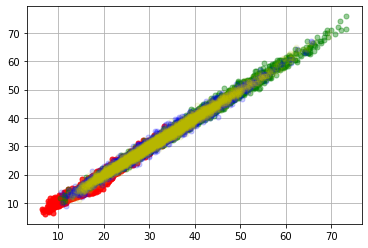

In [28]:
Class = [1,3,7,9]
graph(m, L_tr, Class, [0.8, 0.4, 0.2, 0.1])

#3. K - MEANS

In [29]:
from math import sqrt

#create function to calculate Manhattan distance 
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

Set = 4
and use your implementation of the Maximin algorithm to initialize the cluster centers in
the K-Means algorithm.

In [30]:
def maximin(m,n):
  z_num = n       #centers num
  z = []          #centers
  distance = np.zeros((z_num,M_i))   #manhattan distance between x and centers
  mini = []
  for i in range(M_i):
    mini.append(1000)
  #set z1 the first element
  z.append(m[0])

  #calculate z2 z3 and z4
  for i in range(z_num-1):
    for j in range(M_i):
      distance[i][j] = manhattan(z[i],m[j])
      temp = np.asarray([mini[j],distance[i][j]])
      mini[j] = temp.min()
    z.append(m[mini.index(max(mini))])
  return z

K-Means

In [31]:
def kmeans(X, a):
  z = []
  z = maximin(X, a)
  z_num = a 
  #loops=1
  #print('Loop: '+ str(loops))
  z = np.asarray(z)
  distance = np.zeros((z_num, len(X)))
  labels = np.zeros((len(X)), dtype='int32')  #x belongs to this cluster 
  while(True):
    #calculate distance between z and x
    for i in range(len(X)):
      value_min = np.inf
      for j in range(z_num):
        distance[j][i] = manhattan(z[j],X[i])
        if(distance[j][i]<value_min):
          value_min = distance[j][i]
          index = j
      labels[i]=index
    #calculate new z
    Ni = np.zeros(z_num, dtype='int32')
    Xi = np.zeros((z_num, np.shape(X)[1]))
    z_new = Xi
    for i in range(M_i):
      Ni[labels[i]] = Ni[labels[i]] + 1
      Xi[labels[i]] = Xi[labels[i]] + X[i]
    for i in range(z_num):
      z_new[i] = Xi[i]/Ni[i]
    if((z_new == z).all()):
      break;
    else:
      #loops = loops +1
      z = z_new
  return Ni, Xi, labels


Call kmeans

In [32]:
z_num = 4
Ni, Xi, labels = kmeans(m,z_num)

Visualize the rows of Mˆ in a scatter plot, this time using the
clustering results to assign different colors to different cluster samples.

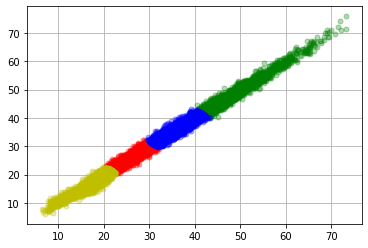

In [33]:
Clusters = [0, 1, 2, 3]
graph(m, labels, Clusters, [0.3, 0.3, 0.3, 0.3])

Use Ltr to calculate
the purity of the clustering results.

In [34]:
def purity(labels, L_tr, Ni):
  counter = np.zeros((5,4))
  sump = 0
  #super smart and cute math trick for lazy people 
  for i in range(M_i):
    counter[L_tr[i]//2][labels[i]] = counter[L_tr[i]//2][labels[i]] + 1
  counter = np.delete(counter, 2, 0)
 
  for i in range(4):   #row
    temp = []
    for j in range(4):  #column
      temp.append(counter[j][i])
    sump = sump + max(temp) / Ni[i]
    print('Purity Class ' + str(i+1) + ' : ' + str(round(max(temp)/ Ni[i] * 100, 2)) + '%')


  print('Total Purity :' + str(sump))
  return sump


# 4. PRINCIPAL COMPONENT ANALYSIS

 Principal Component Analysis (PCA) algorithm

In [35]:
def PCA(X , size):
     
    #Step-1 Subtract the mean of each variable
    X = X - np.mean(X , axis = 0)
     
    #Step-2 Calculate the Covariance Matrix
    cov_mat = np.cov(X , rowvar = False)
     
    #Step-3 Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4 Sort Eigenvalues in descending order
    index = np.argsort(eigen_values)[::-1]
    eigenvalue = eigen_values[index]
    eigenvectors = eigen_vectors[:,index]
     
    #Step-5 Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = eigenvectors[:,0:size]
     
    #Step-6 Transform the data
    X = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()
     
    return X

Visualise for V=2

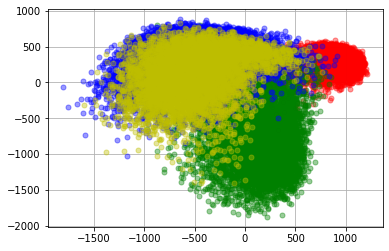

In [36]:
M = np.reshape(M,(-1,784))
m2 = PCA(M, 2)
graph(m2, L_tr, Class, [0.4, 0.4, 0.4, 0.4])

 Execute the K-Means algorithm for m V=2 . Visualize the new clustering results and calculate the clustering purity

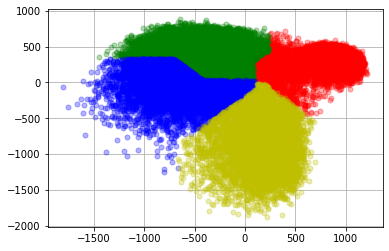

In [37]:
N2, X2, labels2 = kmeans(m2, 4)
graph(m2, labels2, Clusters, [0.3, 0.3, 0.3, 0.3])

Purity for V = 2, 25, 50 & 100

In [38]:
purity_mat = []
V = [2, 25, 50, 100]

for i in V:
    m = PCA(M, i)
    N, X, labels = kmeans(m, 4)
    print('V = ' + str(i))
    purity_mat.append(purity(labels,L_tr, N))

V = 2
Purity Class 1 : 86.97%
Purity Class 2 : 57.47%
Purity Class 3 : 53.61%
Purity Class 4 : 95.07%
Total Purity :2.931243190483888
V = 25
Purity Class 1 : 86.14%
Purity Class 2 : 49.49%
Purity Class 3 : 79.15%
Purity Class 4 : 96.5%
Total Purity :3.1128732454382244
V = 50
Purity Class 1 : 85.71%
Purity Class 2 : 49.43%
Purity Class 3 : 79.85%
Purity Class 4 : 96.46%
Total Purity :3.114528026159362
V = 100
Purity Class 1 : 85.96%
Purity Class 2 : 49.47%
Purity Class 3 : 79.61%
Purity Class 4 : 96.49%
Total Purity :3.1153504221218467


 Find the value of V for which the
clustering purity is maximized 

In [39]:
Vmax = V[purity_mat.index(max(purity_mat))]
Vmax

100